In [37]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('il_cases.csv')
df['date']

0     11/03/2020
1     12/03/2020
2     13/03/2020
3     14/03/2020
4     15/03/2020
5     16/03/2020
6     17/03/2020
7     18/03/2020
8     19/03/2020
9     20/03/2020
10    21/03/2020
11    22/03/2020
12    23/03/2020
Name: date, dtype: object

In [38]:
#date
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['date']

df['new']=df['number'].diff().fillna(0)
df['pct_change'] = np.round(df['new'] / df['number'].shift(1) * 100,1).fillna(0)



In [45]:
rcParams["font.size"]=18

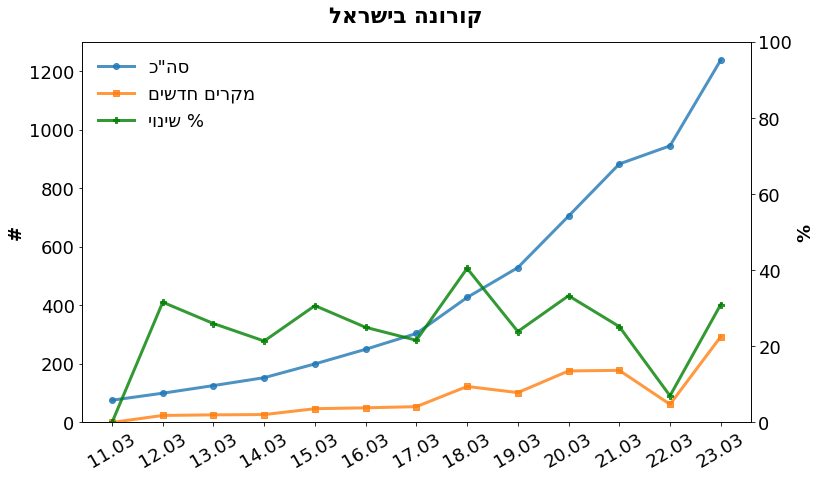

In [65]:
fig, ax = plt.subplots(figsize=(12,7))

ln1 = ax.plot('date', 'number', data=df, marker='o', label='סה"כ'[::-1], alpha=.8, lw=3)
ln2 = ax.plot('date', 'new', data=df, marker='s', label='מקרים חדשים'[::-1], alpha=.8, lw=3)

ax.tick_params('x', labelrotation=30)

ax.set_ylim(0, ax.get_ylim()[1])
axt = ax.twinx()
ln3 = axt.plot('date', 'pct_change', data=df, marker='P', label='% שינוי'[::-1], color='green', alpha=.8, lw=3)
axt.set_ylim(0,100)
axt.set_xticks(df.date)
axt.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

#legend
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, frameon=False)


#ax.legend()
#axt.legend()
ax.set_xticks(df.date)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
# ax.set_xticklabels(list(ax.get_xticklabels()), rotation=30)
# plt.show()
#ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('#', weight='bold')
axt.set_ylabel('%', weight='bold')

fig.suptitle('קורונה בישראל'[::-1], y=.95, weight='bold')
fig.savefig("IL_Corona_cases_he", dpi=300, bbox_inches='tight')

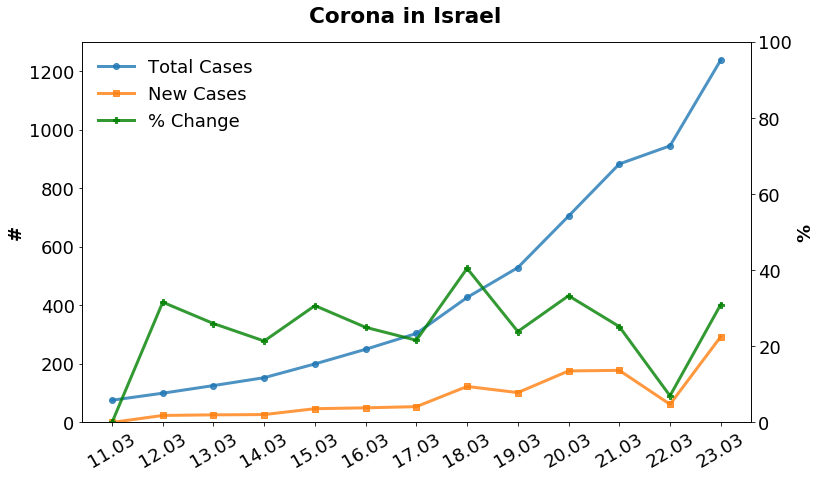

In [66]:
fig, ax = plt.subplots(figsize=(12,7))

ln1 = ax.plot('date', 'number', data=df, marker='o', label='Total Cases', alpha=.8, lw=3)
ln2 = ax.plot('date', 'new', data=df, marker='s', label='New Cases', alpha=.8, lw=3)

ax.tick_params('x', labelrotation=30)

ax.set_ylim(0, ax.get_ylim()[1])
axt = ax.twinx()
ln3 = axt.plot('date', 'pct_change', data=df, marker='P', label='% Change', color='green', alpha=.8, lw=3)
axt.set_ylim(0,100)
axt.set_xticks(df.date)
axt.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))

#legend
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, frameon=False)


#ax.legend()
#axt.legend()
ax.set_xticks(df.date)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d.%m"))
# ax.set_xticklabels(list(ax.get_xticklabels()), rotation=30)
# plt.show()
#ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('#', weight='bold')
axt.set_ylabel('%', weight='bold')

fig.suptitle('Corona in Israel', y=.95, weight='bold')
fig.savefig("IL_Corona_cases_eng", dpi=300, bbox_inches='tight')